In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [67]:
def normalizing_tables(df, col_name):
  uniques = df[col_name].unique()
  map_uniques = {}
  for i, x in enumerate(uniques):
    map_uniques[x] = i
  df[col_name] = df[col_name].apply(lambda x: map_uniques[x])
  return df

In [68]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [69]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
len(data.columns)

12

In [71]:
# print(data.ever_married.value_counts())
# data = normalizing_tables(data, "ever_married")
# data.ever_married.value_counts()
data = data.dropna()
print(data.stroke.value_counts())
columns = data.columns
for col_name in columns:
    if(data[col_name].dtype == object):
        data = normalizing_tables(data, col_name=col_name)

data.info()

0    4700
1     209
Name: stroke, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.6 KB


In [72]:
X = data.drop(columns=["id", "stroke"])
y = data["stroke"].to_list()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.9195519348268839

In [96]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [97]:
print(y_pred[:5])
print(y_test[:5])
print(accuracy)


[0 0 0 0 0]
[0, 0, 0, 0, 0]
0.945010183299389


In [98]:
ones = 0
zeros = 0
for x in y_test:
    if x:
        ones+=1
    else:
        zeros+=1
print(ones)
print(zeros)

51
931


In [99]:
len(y_train)

3927

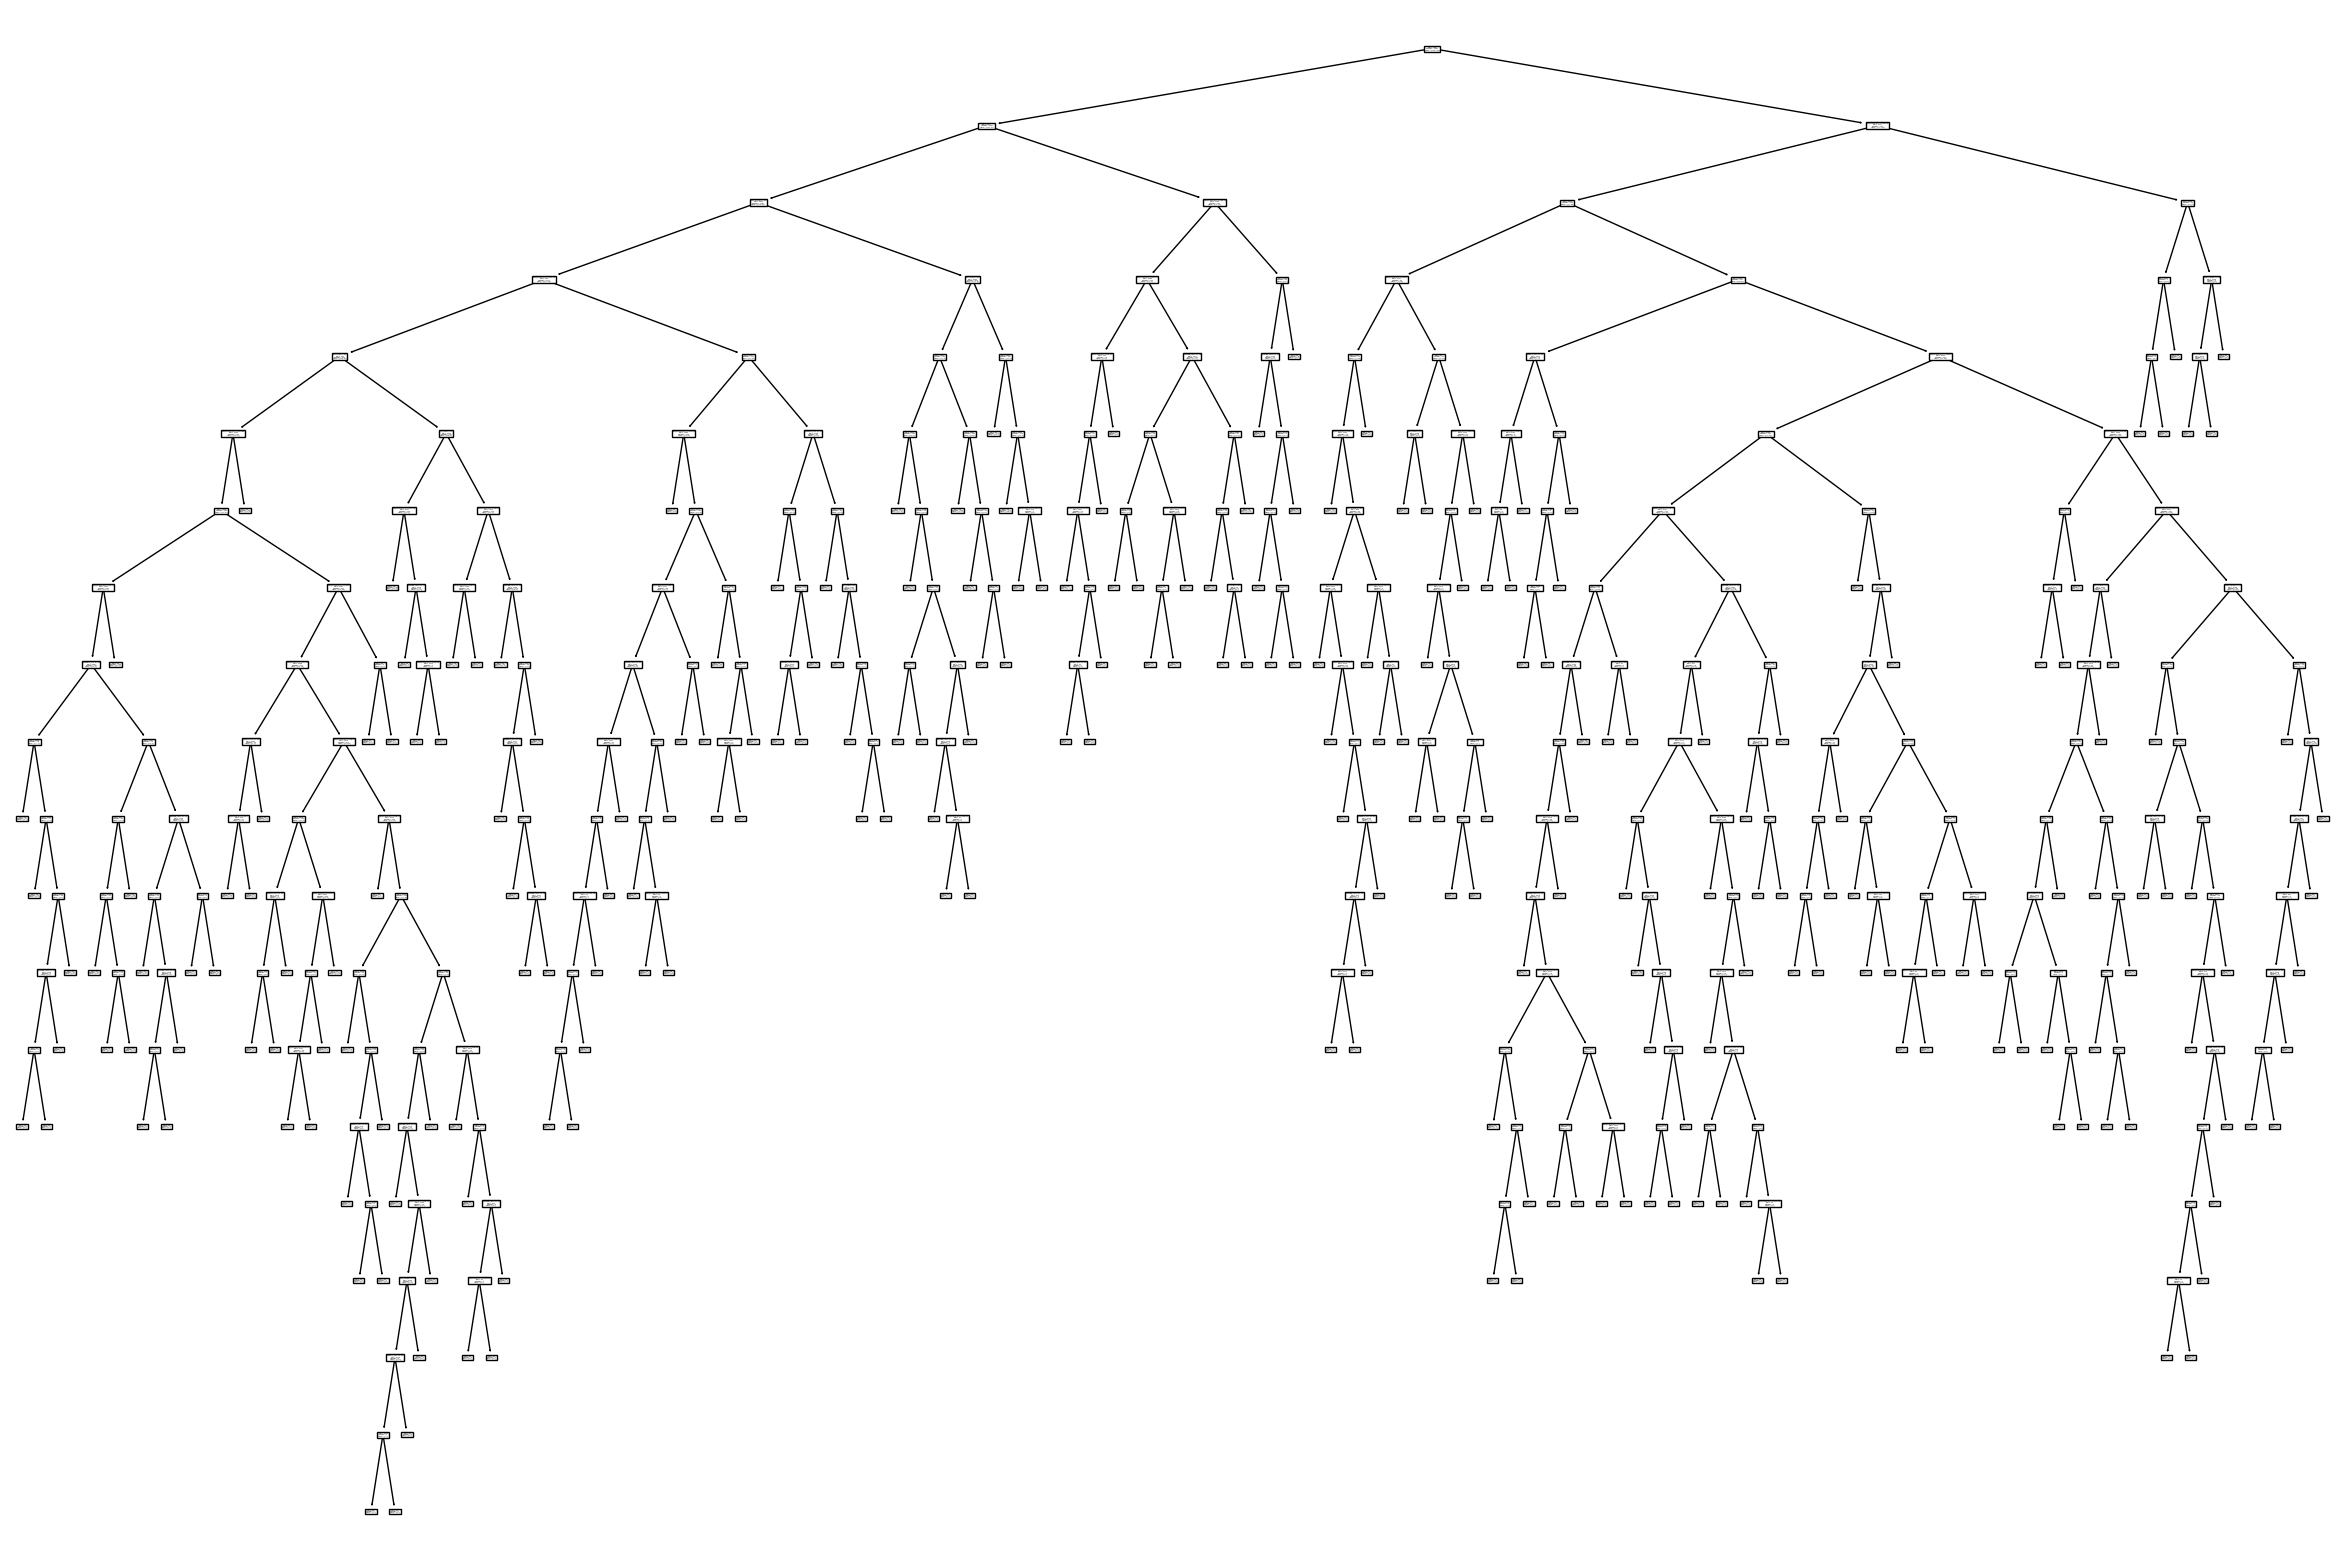

In [100]:
plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0], feature_names = X.columns)
plt.show()

